In [1]:
import tensorflow as tf
import os
import numpy as np
import matplotlib.pyplot as plt
import cv2

C:\Users\Jay Patel\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Jay Patel\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Jay Patel\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\Jay Patel\AppData\Roaming\Pytho

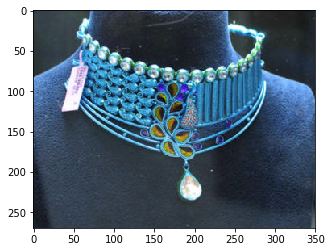

In [2]:
categories = ["gold","silver"]
datadir= "E:\Machine Learning\pythonScripts\images"

for category in categories:
    path = os.path.join(datadir,category)
    for img in os.listdir(path):
        img_array= cv2.imread(os.path.join(path,img),cv2.IMREAD_COLOR)
        plt.imshow(img_array)
        plt.show()
        break;
    break;

In [3]:
print((img_array))

[[[ 51  61  68]
  [ 52  62  69]
  [ 54  64  71]
  ...
  [ 32  37  40]
  [ 32  37  40]
  [ 33  38  41]]

 [[ 51  61  68]
  [ 52  61  70]
  [ 53  62  71]
  ...
  [ 32  37  40]
  [ 32  37  40]
  [ 33  38  41]]

 [[ 51  60  69]
  [ 51  60  70]
  [ 51  60  70]
  ...
  [ 32  37  40]
  [ 32  37  40]
  [ 32  37  40]]

 ...

 [[ 25  34  48]
  [ 27  36  49]
  [ 27  36  49]
  ...
  [ 89 111 116]
  [ 92 113 114]
  [ 94 114 115]]

 [[ 27  36  50]
  [ 28  37  51]
  [ 27  36  50]
  ...
  [ 89 111 116]
  [ 92 113 114]
  [ 95 115 116]]

 [[ 28  37  51]
  [ 28  37  51]
  [ 26  35  49]
  ...
  [ 91 113 118]
  [ 93 114 115]
  [ 98 118 119]]]


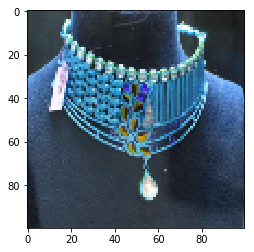

In [4]:
IMG_SIZE = 100

new_array = cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
plt.imshow(new_array)
plt.show()


In [6]:
training_data=[]

def create_training_date():
    for category in categories:
        class_num = categories.index(category)
        path = os.path.join(datadir,category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img))
                new_array=cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
                training_data.append([new_array,class_num])
            except Exception as e:
                pass
create_training_date()

In [7]:
print(len(training_data))

1024


In [9]:
import random 
random.shuffle(training_data)

In [10]:
for sample in training_data[:10]:
    print(sample[1])

0
1
1
0
0
0
1
0
1
0


In [19]:
X=[]
y=[]

In [20]:
for features, labels in training_data:
    X.append(features)
    y.append(labels)

X=np.array(X).reshape(-1,IMG_SIZE,IMG_SIZE,3)


In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten,Conv2D,MaxPool2D

In [23]:
X=X/255.0

In [24]:
model=Sequential()

model.add(Conv2D(64,(3,3),input_shape=X.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPool2D(pool_size=(2,2)))


model.add(Conv2D(64,(3,3)))
model.add(Activation("relu"))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))


model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss="binary_crossentropy",
             optimizer="adam",
             metrics=['accuracy'])

model.fit(X,y,batch_size=32,epochs=10,validation_split=0.1)

W0919 12:49:35.988241 57516 deprecation.py:506] From C:\Users\Jay Patel\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\ops\init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W0919 12:49:36.080021 57516 deprecation.py:323] From C:\Users\Jay Patel\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\ops\nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 921 samples, validate on 103 samples
Epoch 1/10
921/921 [==============================] - 3s 3ms/sample - loss: 0.3759 - acc: 0.8360 - val_loss: 0.3590 - val_acc: 0.9223
Epoch 2/10
921/921 [==============================] - 1s 1ms/sample - loss: 0.2549 - acc: 0.9121 - val_loss: 0.2829 - val_acc: 0.9417
Epoch 3/10
921/921 [==============================] - 1s 1ms/sample - loss: 0.1430 - acc: 0.9468 - val_loss: 0.1320 - val_acc: 0.9612
Epoch 4/10
921/921 [==============================] - 1s 999us/sample - loss: 0.0747 - acc: 0.9707 - val_loss: 0.1106 - val_acc: 0.9612
Epoch 5/10
921/921 [==============================] - 1s 1ms/sample - loss: 0.0518 - acc: 0.9815 - val_loss: 0.2039 - val_acc: 0.9223
Epoch 6/10
921/921 [==============================] - 1s 1ms/sample - loss: 0.0571 - acc: 0.9772 - val_loss: 0.1507 - val_acc: 0.9515
Epoch 7/10
921/921 [==============================] - 1s 995us/sample - loss: 0.0307 - acc: 0.9891 - val_loss: 0.1775 - val_acc: 0.9320
Epoch 8/10
9

In [25]:
def prepare(filePath):
    IMG_SIZE=100
    img_array=cv2.imread(filePath)
    new_array=cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
    
    return new_array.reshape(-1,IMG_SIZE,IMG_SIZE,3)



    
    

#prediction = model.predict("E:\\Machine Learning\\pythonScripts\\test4.jpg")

In [27]:
prediction = model.predict([prepare("E:\\test2.jpg")])
if (("0" in str(prediction))==True):
    print("Image Contains Gold")
else:
    print("Image Contains Silver")

Image Contains Gold


In [89]:
model.save('JayCNN.model')